# Haulage company APS_FAILURE_SET_ANALYSIS


## Add cover_sheet

# Refrences
1. Hector Cuesta (2013) Practical Data Analysis. Birmingham, UK: Packt Publishing. Available at: https://search.ebscohost.com/login.aspx?direct=true&db=e250xww&AN=654543&site=eds-live&scope=site (Accessed: 18 October 2023).

# 1 : Introduction 
### 1.1 What is data
Data are plain facts gathered within a defined context. Statistians would refer to it has set of obsevations, which contain variables or column of varying/unique characteristic. Data can also be referred to as a piece of information after it has been summarised, and when subjected to analysis, data can be reffered to as an evidence of a hypothesis. Before data can become an information and utilmately an evidence it must go through a process. Data analysis is the process in which raw data is ordered and organized, to be used in methods that help to explain the past and predict the future (Hector, 2013). I have been retained by Haulage company to get information and ultimately evidence from their 'aps_failure_set' data-set and to do this i will be using the process of data analysis 
### 1.2 Understanding dataset
Disclaimer: This is a summary of the information provided by David

'aps_failure_set' dataset was collected from the everyday usage of heavy Scania trucks. Data has been collected specifically on Air Pressure system (APS) and stored in comma-separated value(csv) file. The sytem generates generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes. 
### 1.3 Objectives
1. Set up github account to tract project implementation 
2. Download and load 'aps_failure_set.csv' load Jupytanotbook in pandas datafram form to allow data manupulation
3. Import appropraite laibraries needed for data manipulation
4. Perform indepth early data analysis
5. Perform data cleaning 
6. Define Curse of Dimentinality in my words and explain how it will impact analysis from this stage
7. Apply PCA to dataset and get the feature needed to prsearve pattern in the dataset
8. With pattern, apply appropriate Machine learning modle to dataset to make furture predictions

### 1.3 Problem definination
H company wants an analysis of the data colleted, to help determine the investment strategy for the upcoming year. 

Company wants an anlysis of failure's, and see information of failuures related to APS relative to thos fai;ures not related to APS. 
they had in sytemsDataset seek t positive class consists of component failures for a specific component of the APS system.

and it has been stroed in comma separated format

in methods that help to explain the past and predict the future. 
in methods that help to explain the past and predict the future. 
**talking about python:** Though the project breif specifically instructed that this analyssis be carried out using python jupytanoot book only, for the purpose of infor mation it is worth noting that python is the...... **Then proceed to talk about its unique future comprared to other DA language**

In [2]:
#Importing packages i need for EDA
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Early data anlysis (EDA)

In [3]:
# reading dataset using pandas
air_p= pd.read_csv('aps_failure_set.csv')

## Expalin loading data and what head and tain mean 

In [32]:
#Geeting the first five rows of the data 
air_p.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [31]:
#Getting the last five row of the dataset
air_p.tail()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


In [6]:
# checking for the size of the data
air_p.shape
#There are 60000 rows and 171 columns

(60000, 171)

In [15]:
# need more infor on the data types 
air_p.info()
#Wecan see that this give a more precice response, stating that the are 170 object i.e columns that are categorical or has
# strings in them making them return object and we have 1 numerical column or has int in its entry which is the class.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


## Alot of features
Using the .shape method, i can see that i have 171 feautures  but the 'air_p' df displays only 20 features. Using the .info method, i can see that my class feauture is object, and only one censure 'aa_000' returns to be integer,and 169 feautures are objectives.
I would like to be able to work with individual feautur and explore it. To do this, i will load the dataset in phases using indexing.

In [54]:
# The AP1 df returns the first 20 features and all the rows
AP1= air_p.iloc[ : , :20]
AP1.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0
4,neg,60874,na,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226


## From Here

In [149]:
missing_value_formats = ['na']
tr_y = pd.read_csv('aps_failure_set.csv', na_values = missing_value_formats)

In [150]:
tr_y.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [151]:
tr_y.shape

(60000, 171)

In [152]:
tr_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [153]:
# Now the 'na' str in the ab_000 component as turned to nan
tr_y['ab_000'].unique()

array([ nan,   0.,   2.,   4.,   6.,   8.,  18.,  10.,  12.,  16., 204.,
        24., 134.,  90.,  26.,  14.,  34.,  52.,  20.,  22.,  30.,  36.,
       100.,  48.,  58.,  32.,  28.,  44.,  46.,  68.])

## To here
### Am try somthing.. 
Am check if there are any other unique values other than 'na'
I specified that all 'na' objects should be treated as NAN values

In [55]:
AP1.shape

(60000, 20)

In [56]:
AP1.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
af_000    0
ag_000    0
ag_001    0
ag_002    0
ag_003    0
ag_004    0
ag_005    0
ag_006    0
ag_007    0
ag_008    0
ag_009    0
ah_000    0
ai_000    0
aj_000    0
dtype: int64

In [105]:
AP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   60000 non-null  object
 1   aa_000  60000 non-null  int64 
 2   ab_000  60000 non-null  object
 3   ac_000  60000 non-null  object
 4   ad_000  60000 non-null  object
 5   ae_000  60000 non-null  object
 6   af_000  60000 non-null  object
 7   ag_000  60000 non-null  object
 8   ag_001  60000 non-null  object
 9   ag_002  60000 non-null  object
 10  ag_003  60000 non-null  object
 11  ag_004  60000 non-null  object
 12  ag_005  60000 non-null  object
 13  ag_006  60000 non-null  object
 14  ag_007  60000 non-null  object
 15  ag_008  60000 non-null  object
 16  ag_009  60000 non-null  object
 17  ah_000  60000 non-null  object
 18  ai_000  60000 non-null  object
 19  aj_000  60000 non-null  object
dtypes: int64(1), object(19)
memory usage: 9.2+ MB


### storing unique features
1. na

## Exploring each feature in AP1 for unique values
The censor systems all came back as onject which means the are some objects in the feautures, i wish to explore the unique features ineach columns to be able to fixt the datatypes

In [148]:
# Unique values in class
c_unique= AP1["class"].unique()
print(c_unique)

['neg' 'pos']


In [60]:
# Getting the unique values in the class column to be able to veiw the integer
# The 'ab_000' column should be integer but we have some missing values in it that has been replaced with 'na'
AP1['ab_000'].head(10)

0    na
1    na
2    na
3     0
4    na
5    na
6     0
7    na
8    na
9     0
Name: ab_000, dtype: object

In [61]:
# To get all the uniqe values in the 'ab_000'
# the '.unique()' compared to the '.head()' returns all the uniqe data tpyes i have in the column helping me to see all the
# rows that are not integers
AP1['ab_000'].unique()
# we can see that 'na' is the only type of str we have in the column which represent null values

array(['na', '0', '2', '4', '6', '8', '18', '10', '12', '16', '204', '24',
       '134', '90', '26', '14', '34', '52', '20', '22', '30', '36', '100',
       '48', '58', '32', '28', '44', '46', '68'], dtype=object)

In [62]:
AP1['ac_000'].unique()

array(['2130706438', '0', '228', ..., '8974', '123514', '2602'],
      dtype=object)

In [69]:
AP1['ad_000'].unique()

array(['280', 'na', '100', ..., '5286', '3608', '194868'], dtype=object)

In [70]:
AP1['ae_000'].unique()

array(['0', '16', '104', 'na', '2', '222', '4', '290', '1286', '170', '6',
       '806', '1464', '274', '18', '8', '342', '64', '34', '192', '144',
       '176', '1512', '120', '58', '114', '460', '12', '112', '1314',
       '20', '550', '36', '1424', '180', '324', '204', '254', '106',
       '154', '92', '256', '202', '352', '26', '124', '2240', '466',
       '778', '28', '100', '14', '276', '42', '82', '22', '384', '282',
       '386', '98', '164', '108', '86', '38', '266', '1056', '134', '10',
       '200', '150', '326', '350', '398', '424', '32', '128', '752',
       '314', '732', '2312', '400', '158', '668', '30', '212', '224',
       '950', '4726', '60', '226', '388', '640', '258', '62', '206', '44',
       '414', '458', '78', '492', '308', '52', '50', '162', '24', '662',
       '536', '456', '130', '140', '184', '368', '146', '118', '138',
       '872', '530', '1118', '356', '218', '126', '102', '1130', '12048',
       '1508', '396', '374', '658', '816', '556', '216', '66', '760

In [85]:
#Also has 'na'
AP1['af_000'].unique()

array(['0', '10', '20', '172', 'na', '30', '2', '296', '452', '1384',
       '488', '4', '6', '3220', '1808', '538', '14', '12', '274', '78',
       '22', '330', '188', '160', '8', '746', '238', '64', '164', '362',
       '410', '24', '294', '198', '54', '834', '32', '2704', '324', '766',
       '206', '2706', '156', '250', '2430', '154', '252', '170', '358',
       '4768', '46', '1320', '1776', '680', '576', '114', '96', '98',
       '28', '44', '132', '876', '572', '332', '368', '514', '242', '104',
       '26', '404', '240', '178', '352', '394', '642', '930', '456',
       '620', '316', '614', '52', '808', '2240', '1970', '1082', '42',
       '1358', '244', '508', '120', '1290', '6506', '60', '304', '226',
       '558', '138', '212', '372', '2844', '484', '56', '266', '100',
       '184', '34', '190', '878', '350', '982', '292', '1002', '40', '86',
       '288', '216', '2648', '36', '48', '460', '256', '224', '298',
       '510', '424', '110', '1054', '18', '1440', '536', '732', '10

In [88]:
# Also have 'na' as unique
AP1['ag_000'].unique()

array(['0', '3382', 'na', '776', '2', '4808', '12', '4372', '11912',
       '454', '13044', '16186', '29794', '876', '8', '34', '63896', '64',
       '3376892', '299736', '206336', '51610', '4436', '16', '242', '104',
       '16462', '21000', '7002', '30', '228', '850604', '170', '760',
       '28', '58096', '6', '268780', '1722', '7212', '8252', '1262',
       '19442', '4', '24', '3718', '223654', '306898', '246', '17706',
       '406', '15626', '14630', '96954', '69054', '544866', '1540',
       '17280', '32', '196', '326', '3272', '1170', '127544', '48', '62',
       '1354', '550', '443614', '22', '48820', '20614', '2664', '234',
       '316', '11486', '318', '22320', '998', '8870', '67966', '50066',
       '1266', '206', '510', '48020', '6772', '2088', '676', '44212',
       '10682', '26884', '156', '360', '136', '1994', '256', '58270',
       '60334', '26', '14', '15980', '2710', '35888', '6604', '124',
       '116', '1134', '82', '45862', '58806', '11184', '1314', '204',
       '

In [89]:
#Also has 'na'
AP1['ag_001'].unique()

array(['0', '49536', 'na', '244', '281128', '8632', '50394', '1430',
       '14868', '1280', '2', '312', '215720', '140526', '15166', '34244',
       '6086', '2716', '12', '126', '66', '1094', '3564', '1342', '1566',
       '29190', '34934', '86114', '530916', '96944', '68084', '4538',
       '14450', '502', '34', '34864', '37656', '16532', '1752', '3268',
       '1152', '2348', '660', '448', '6138', '19702', '226226', '83006',
       '136', '4262', '304856', '402040', '12010', '18644', '21072',
       '22614', '10498', '321850', '53878', '24350', '186574', '4822',
       '98586', '2698', '4058', '75826', '4712', '26', '15148', '3430',
       '174', '60', '7824', '135062', '232', '26212', '221266', '582',
       '634', '6782', '115488', '68452', '15952', '732', '7762', '1218',
       '4686', '28762', '15592', '3642', '14', '1522', '21028', '290132',
       '187392', '1096', '7048', '64', '24', '40456', '1516', '428',
       '1586', '13986', '618212', '46562', '35414', '131050', '294',


In [90]:
AP1['ag_002'].unique()

array(['0', '9744', '222', ..., '17526', '9904', '5744'], dtype=object)

In [91]:
AP1['ag_003'].unique()

array(['0', '318', '11804', ..., '8348', '9046', '18118'], dtype=object)

In [92]:
AP1['ag_004'].unique()

array(['37250', '18254', '1648', ..., '43536', '32154', '59100'],
      dtype=object)

In [97]:
AP1['ag_005'].unique(),
AP1['ag_006'].unique(),
AP1['ag_007'].unique(),
AP1['ag_008'].unique(),
AP1['ag_009'].unique(),

(array(['0', '660', '876', ..., '5116', '29422', '59754'], dtype=object),)

In [98]:
AP1['ah_000'].unique(),
AP1['ai_000'].unique(),
AP1['aj_000'].unique(),

(array(['0', '68', '226', '80', '64', '58', '32', '11548', '682', '992',
        '302', '70', '31432', 'na', '154', '230', '174', '42', '36', '60',
        '124', '86', '110', '106', '16650', '92', '468', '50', '2542',
        '122', '562', '46', '402', '24', '38', '26', '196', '42544',
        '2782', '40', '326', '62', '198', '28', '56', '108', '126',
        '426786', '164', '240', '216', '88', '84', '4', '48', '252', '286',
        '278', '420', '12830', '144', '180', '100', '66', '186', '134',
        '150', '78', '132', '204', '370', '44', '168', '208', '210',
        '8832', '102', '8', '4714', '94', '2206', '774', '34', '140',
        '318', '74', '104', '146', '260', '90', '270', '96', '316', '294',
        '195754', '224', '170', '12', '444', '242', '334', '18', '284',
        '16', '176', '156', '436', '54', '76', '292', '972', '274', '412',
        '200', '184', '136', '52', '118', '14', '128', '400', '232', '190',
        '72', '178', '324', '328', '27384', '82', '1734', '

# Finding in AP1. 
AP1 contain the first 20 feuturues of 'aps_failure_set.csv'. I read the first 20 featurs because after reading the dataset the first time, and assigning it in variable 'air_p' i found that 169 of the component variables are all objects, and the data dictionary specifies they should be float. So to get an insight into why the floats are override by object in the columns, i needed to explore each feuture in the df to get the unique values in them, so as to be able to handle this unique feutures accordingly. 
However, 'air_p' only read first 10 and last 10 columns of the 'aps_failure_set.csv', so to to be able to read other columns i decided to use indexing to get specific columns. Index '[ : , : 20]' returned the first 20 feuture of my main dataset. This implementation gave the feuture names i needed to acess each column. 

# Findings
Usin the '.unique()' method i was able to see the unique values in each column. 'na' is an object and it was returned in majority of the AP1 df. However, some features in AP1 did not have return 'na' in the returned array. 

# AP2
I want to explore features in index '[ : ,20:40]'. 

In [135]:
# The AP1 df returns the second 20 features and all the rows
AP2= air_p.iloc[ : ,20:40]
AP2.head()

,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006
0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660
1,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720
2,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456
3,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0
4,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,2128914


In [155]:
AP2.shape 

(60000, 20)

## Using function to iterate throught the entire df

### Why am i doing this
The dataset is a large one, i could continue to use the method which i used for AP1 for the remaing 7 df's if i break aip_pressure.csv down to 20columns per df. But as seen in [Mention the names of the columns that didnt shown all unique value] not all the unique values were returned because 'unique()' method simply mean evething unique, and in the columns stated above, the unique values where much so the ram could not display all at once leaving some blank inbetween. This will not serve the purpose i want to achive which is to see all the unique dtypes in my columns so as to be able to adress them accordingly. 
 **Note: Look up pandas refrence to coroborate this statement about the uses of the methods you are calling***

In [132]:
# Not working, try somthing else...

# This is a function that filters the columns in a dataframe to get the uniqe str values.
# i want try this function to filter my dastaset
def get_str(df): #This line initiate the funtion definifition usinf the 'def' method and naming the function 'get_object'
                    # And df as agument to represent dataframe
    str = []    # This opens and empyty list where the objects found in the dataset would be stored assigned to objects

    for row in df[column]:# using for loop,"For the column in a df"
        for row in df[column]:# "For the obsevations in the columns found in the df"
            if isinstance(row, str): #"If the the obsevation you see is an object"
                 str.append(row)  # "Add the obsevation to the Object list". With the append method, am ensuring that no
                                    # observation replaces another in the list, the append keep add to the list.
    return str # "Return the list object". This will produce a list of all the objects in my df at once.

In [134]:
# Not working 

# Trying the funtion with a subset df
all_unique_str= get_str(AP2)
print(all_unique_str)

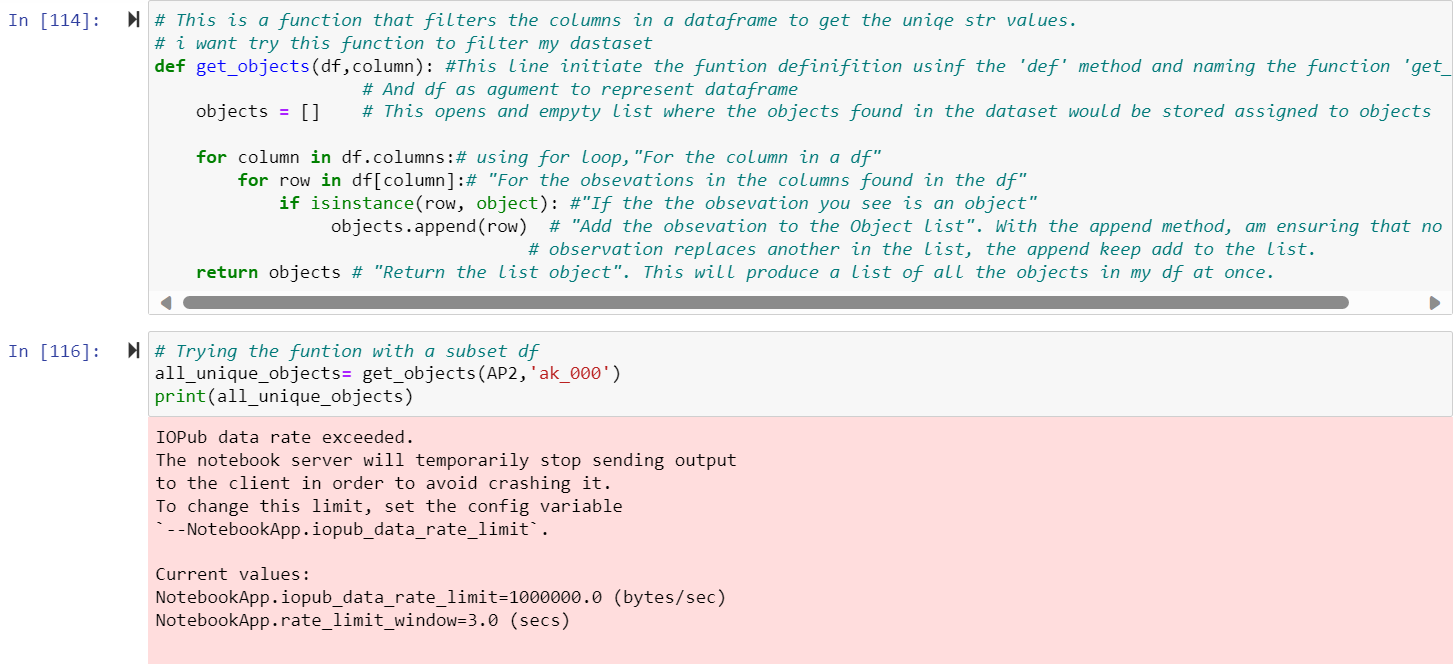

## Error message explanation
"The code you provided seems to be exceeding the IOPub data rate, which is the rate at which data can be sent between the kernel and the front-end. This can happen when there is a large amount of output being generated by the code"[https://code-mentor.ai/]
As shown in the image above, i wrote a function that i intend to use to get all the 'str' in my entire df. I tried calling the funtion and passing df 'AP2' which is a subset of df 'aip_p' as agument for trial. The result generated suggests that the out put my function is generating is  large and the output has exceeded the data rate which is a contrary output to what i was hoping to get 'na'. I was expecting 'na' and possibly oythers because 'na' i have seen it come up in diffrent comopnent colunms. 
***Refrence this and paraphrase***

## Plan going forward. 
Why is there so much output? I was expecting "na" and probably few other objects not so much to exceed data rate.
**whats an 'object'?**
"Objects are variables that contain data and functions that can be used to manipulate the data. The object's data can vary in type (string, integer, etc.)"[https://blog.hubspot.com/website/python-object#:~:text=What%20is%20an%20object%20in,set%20of%20rules%20and%20behaviors.] According to this author, my undersanding of object now is that it is a variable, and it can hold diffrent datatypes in it. Therefore, my component columns that returned objects as their dtypes does not necessarrly mean that i have only float according to data dictionary and str 'na' according to output from '.unique()' method alone in component variables, they contained a lot more diffrent datatypes which is why the function 'get_objects' is returning the exceeded limit message. 
Furthermore, "Python is an object oriented programming language. Almost everything in Python is an object, with its properties and methods."[https://www.w3schools.com/python/python_classes.asp] ** Refrence this W3shool*** which suggests that Objects can hold data's of diffrent properties in it. 
With this, i now know that function 'get_object' can not performe what i intend to use it for which is to print only 'str' dtypes. 

## Converting 'na' to null_values(NAN)
I have seen 'na' come up multiple times as unique value in the compomnent variables. 'na' is a format that represents null values, i am going to create a list containg 'na' and assing it to a new variable, 'missing_value_format', them reading the 'aps_failure_set.csv' df and paassing an argument that specifies that "anywhere 'na; is seen in the 'aps_failure_set.csv', it should be returned assigned nullvalue. I want to see the effect this has on my dtypes after the 'na' strings is replaced.

In [169]:
missing_value_format = ['na']
df= pd.read_csv('aps_failure_set.csv', na_values = missing_value_formats)
df.head(2)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0


In [170]:
#Checking the types now. 
df.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

In [171]:
#object; 1
#int64; 1
#float64;169
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [172]:
df.shape

(60000, 171)

## Result analysis
Now componemt ['ab_000'-eg_000] which represents 169 out of my 170 component variables are now float, this suggests to me that the 'na' strings have been replaced by with null(NAN), changing the dtypes of those component variables from objects to floats. 
Data type been output as float means that all the rows in ['ab_000'-eg_000] component variables are now float except the rows containg NAN
However, one of my components 'aa_000' is still an integer, which is an incorect format it should be in. According to the data dictionary, it should be a float.
The component 'aa_000' data type been an integer suggests to me that one or more rows in this variable is an integer not floats. 

## Conversion of integer to float 
Using the '.astype()' as shown below, i have converted the observations in the 'aa_000' component variable to float from integer. 

In [192]:
#Data type conversion from pandas 
aa_f= df['aa_000'].astype(float)
aa_f.head()

0    76698.0
1    33058.0
2    41040.0
3       12.0
4    60874.0
Name: aa_000, dtype: float64

In [193]:
aa_f.info

<bound method Series.info of 0         76698.0
1         33058.0
2         41040.0
3            12.0
4         60874.0
           ...   
59995    153002.0
59996      2286.0
59997       112.0
59998     80292.0
59999     40222.0
Name: aa_000, Length: 60000, dtype: float64>

In [194]:
aa_f.shape

(60000,)

In [176]:
#Checking if the 'aa_000' column was changed in my main df. 
df.head(2)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0


In [179]:
#It was not changed
df.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

## Converting all components sensors to float
Using the '.astype()' i was able to convert the a_000 sensor component to float. However this change was not implented in my main df because i assigned the operation to variable aa_f. 
Since all the component variables are floats according to data dictionary, i am going to drop class from my main(df) and assing the new df that has no class it to df_no_class, while still holding my class variable in df dataframe. Then convert 'df_no_class' to float and assign this float df to 'df_all_float'. 

In [180]:
df_no_class=df.drop(columns=['class'])
df_no_class.head(3)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0


In [182]:
df_all_float= df_no_class.astype(float)
df_all_float.head(3)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0


In [183]:
df_all_float.dtypes

aa_000    float64
ab_000    float64
ac_000    float64
ad_000    float64
ae_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 170, dtype: object

In [185]:
# Now all 170 component sensor are now floats
df_all_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 170 entries, aa_000 to eg_000
dtypes: float64(170)
memory usage: 77.8 MB


## CLass EDA 
I do not need the class variable to perform pca so i am goinng to keep it in a new df(df_class).

In [197]:
df_class= df['class']
df_class.shape

(60000,)

In [215]:
#Decribing the values in class
df_class.describe(include="object")

count     60000
unique        2
top         neg
freq      59000
Name: class, dtype: object

In [218]:
df_class.duplicated().sum()

59998

In [206]:
#The class variable has no null values
df_class.isnull().sum()

0

In [221]:
# I want to see the distribution of the obsevations in class
#sns.barplot(data= df_class)

In [208]:
# renaming the df that contain all my component sensors as com_sen
com_sen= df_all_float

In [210]:
com_sen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 170 entries, aa_000 to eg_000
dtypes: float64(170)
memory usage: 77.8 MB


# Component sensors EDA
## Dealing with null value

In [214]:
com_sen.isnull().sum()

aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 170, dtype: int64

In [216]:
#No duplicated values 
com_sen.duplicated().sum()

0

In [212]:
com_sen.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


### Continue with dealing with missing value **read how to deal with missing data note**
### Then define Curse of dimentionality
### Then tell how it will impact you analysis going forward ** tip, the feutures are too large, so the data requeared to have ameanifulf insight will all be very large, so to be able to anlyse we need to use pca to reduce dimension and the get patter.....**
#### Then get the number of feuturs needed
#### Apply what you got.....

## this is needed after you have reduced you data dimentionality
## Joning class back into the main df
All component sensors are now floats, i will use the merge() method. This helps me to creat a new dataframe that contain all component sensor in float format and class in object format.

In [222]:
#pd.merge(df_all_float, df.iloc[:, [0]], how='left', on='key')

In [104]:
AP2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ak_000  60000 non-null  object
 1   al_000  60000 non-null  object
 2   am_0    60000 non-null  object
 3   an_000  60000 non-null  object
 4   ao_000  60000 non-null  object
 5   ap_000  60000 non-null  object
 6   aq_000  60000 non-null  object
 7   ar_000  60000 non-null  object
 8   as_000  60000 non-null  object
 9   at_000  60000 non-null  object
 10  au_000  60000 non-null  object
 11  av_000  60000 non-null  object
 12  ax_000  60000 non-null  object
 13  ay_000  60000 non-null  object
 14  ay_001  60000 non-null  object
 15  ay_002  60000 non-null  object
 16  ay_003  60000 non-null  object
 17  ay_004  60000 non-null  object
 18  ay_005  60000 non-null  object
 19  ay_006  60000 non-null  object
dtypes: object(20)
memory usage: 9.2+ MB


In [8]:
#Checking for missing vales
#air_p.isnull()
# while this code produces some results suggeting that there are no empyty rows
air_p.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [48]:
air_p.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [50]:
air_p['ab_000'].shape

(60000,)

In [51]:
air_p['ac_000'].shape

(60000,)